In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
df = pd.read_excel(r'Clinical_Data_Validation_Cohort.xlsx')

In [5]:
## Check the first few rows
df.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,None,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,None,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,None,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,None,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,None,1,Negative,Negative


## Dataset Information

In [7]:
# Display number of rows and columns
print(df.shape)

(95, 14)


In [8]:
# Display data types of columns
print(df.dtypes)

Patient ID                     object
Survival time (days)            int64
Event (death: 1, alive: 0)      int64
Tumor size (cm)               float64
Grade                           int64
Stage (TNM 8th edition)        object
Age                             int64
Sex                            object
Cigarette                      object
Pack per year                 float64
Type.Adjuvant                  object
batch                           int64
EGFR                           object
KRAS                           object
dtype: object


In [9]:
# # Check for missing value
print(df.isnull().sum())

Patient ID                     0
Survival time (days)           0
Event (death: 1, alive: 0)     0
Tumor size (cm)                0
Grade                          0
Stage (TNM 8th edition)        0
Age                            0
Sex                            0
Cigarette                      0
Pack per year                  0
Type.Adjuvant                  2
batch                          0
EGFR                           9
KRAS                          30
dtype: int64


## EDA

### Summary Statistics

In [10]:
# Summary Statistics
print(df.describe())  # Summary statistics for numeric columns

       Survival time (days)  Event (death: 1, alive: 0)  Tumor size (cm)  \
count             95.000000                   95.000000        95.000000   
mean            1471.515789                    0.410526         2.854737   
std              681.642133                    0.494539         1.365281   
min               50.000000                    0.000000         1.100000   
25%              898.500000                    0.000000         2.000000   
50%             1760.000000                    0.000000         2.400000   
75%             1981.000000                    1.000000         3.500000   
max             2532.000000                    1.000000         7.000000   

           Grade        Age  Pack per year      batch  
count  95.000000  95.000000      95.000000  95.000000  
mean    2.368421  66.589474      29.253684   2.431579  
std     0.602347   9.698097      26.205783   0.807579  
min     1.000000  48.000000       0.000000   1.000000  
25%     2.000000  60.000000       2

### Visualization

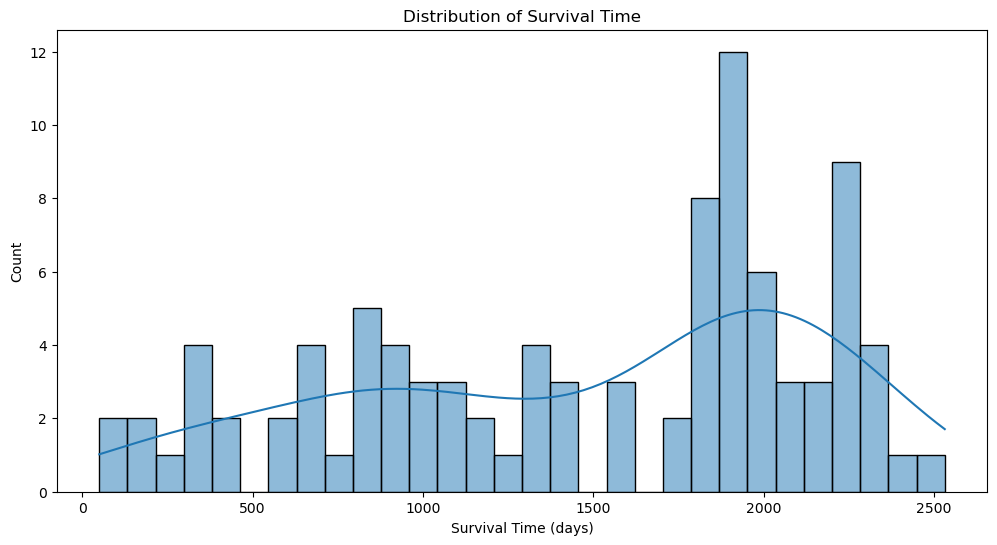

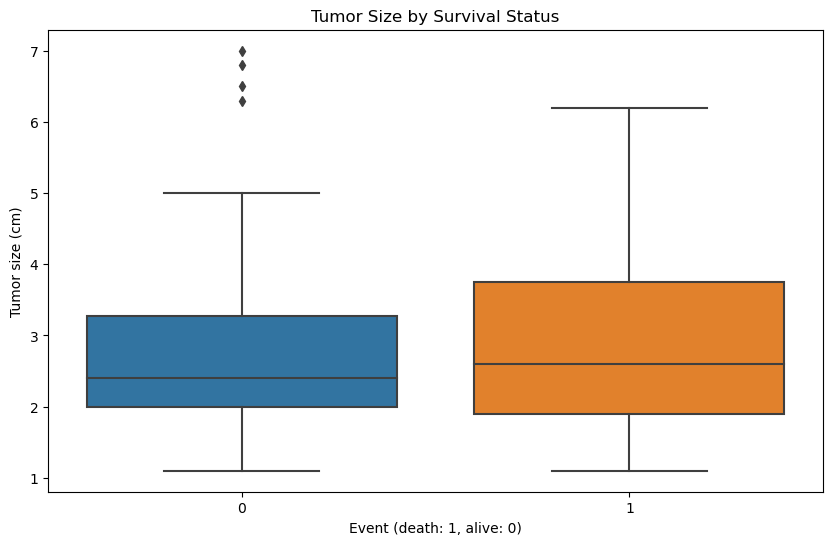

In [11]:
# Distribution of Variables
plt.figure(figsize=(12, 6))
sns.histplot(df['Survival time (days)'], bins=30, kde=True)
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (days)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Event (death: 1, alive: 0)', y='Tumor size (cm)', data=df)
plt.title('Tumor Size by Survival Status')
plt.show()

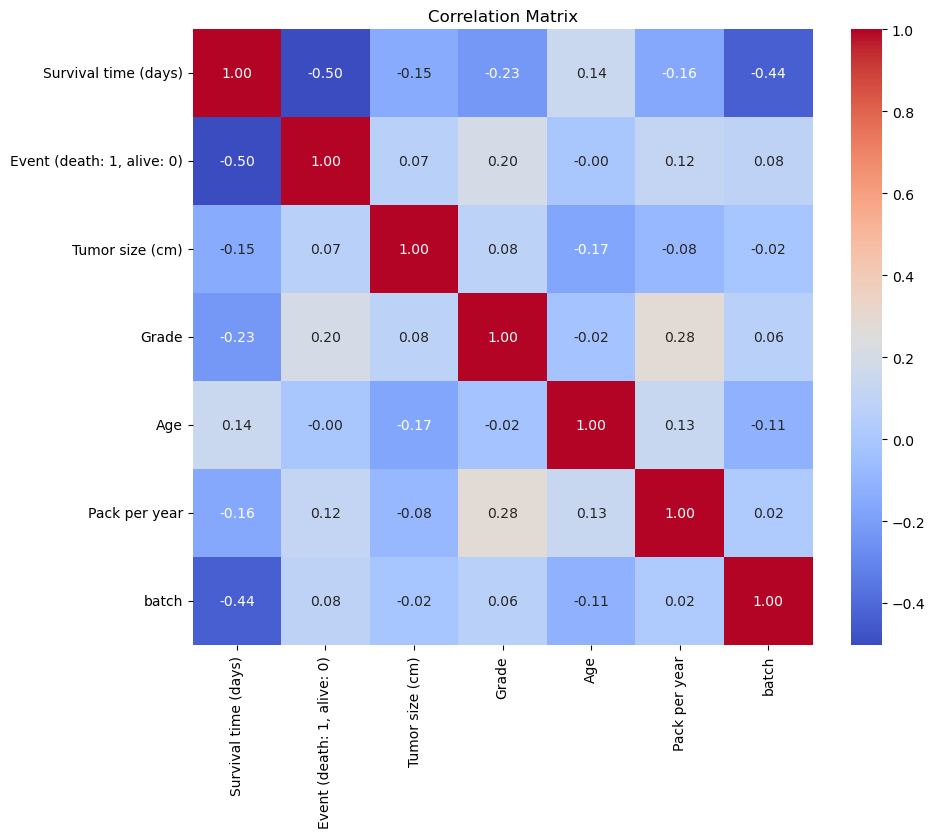

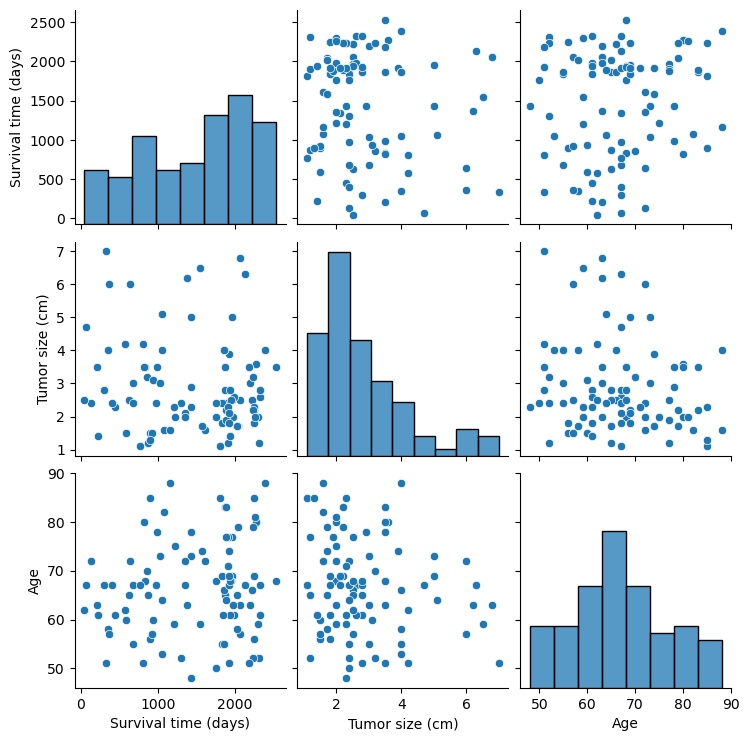

In [12]:
# Relationships Between Variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['Survival time (days)', 'Tumor size (cm)', 'Age']])
plt.show()

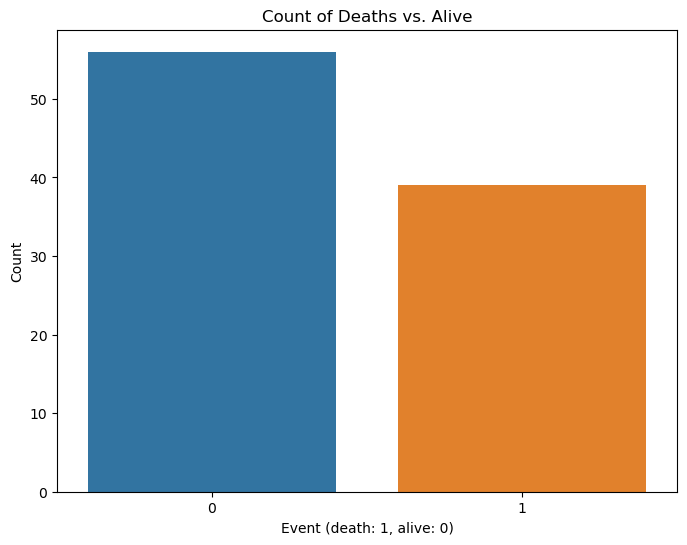

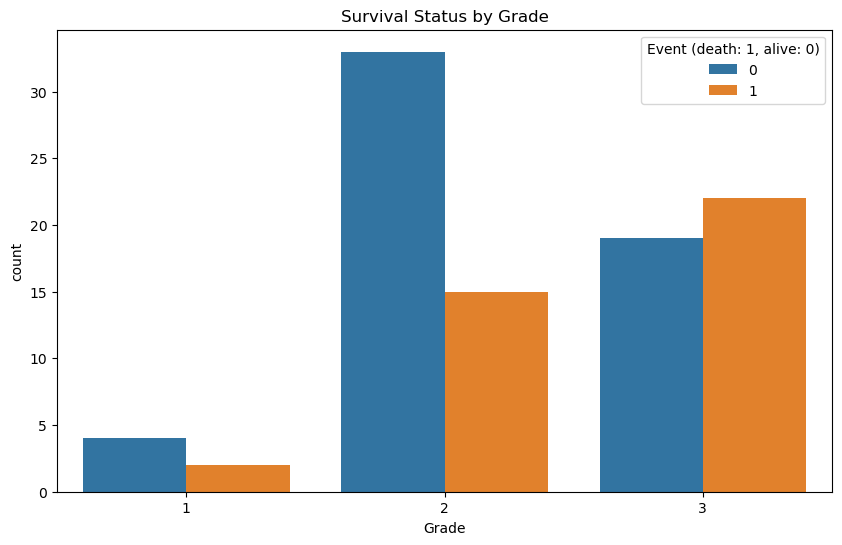

In [13]:
# Categorical Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='Event (death: 1, alive: 0)', data=df)
plt.title('Count of Deaths vs. Alive')
plt.xlabel('Event (death: 1, alive: 0)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', hue='Event (death: 1, alive: 0)', data=df)
plt.title('Survival Status by Grade')
plt.show()

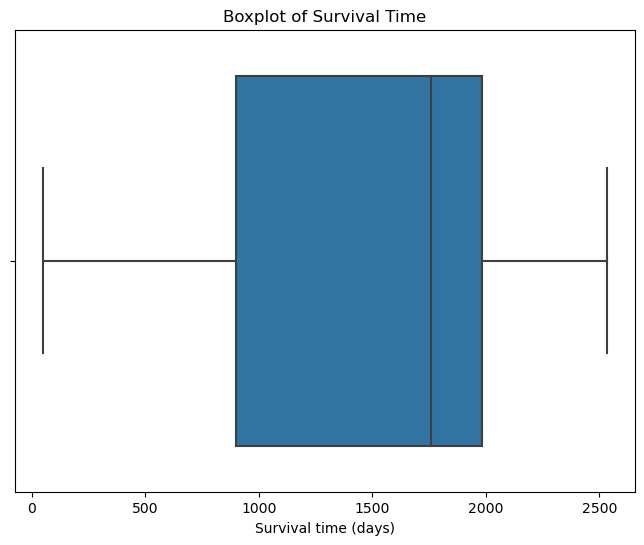

In [14]:
# Additional plots for other categorical variables like Stage, Sex, Cigarette, etc.

# Outliers Detection
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survival time (days)', data=df)
plt.title('Boxplot of Survival Time')
plt.show()

## Discrete Poisson Distribution

In [15]:
# Calculate lambda for Poisson distribution (average survival time)
lambda_poisson = np.mean(df[df['Event (death: 1, alive: 0)'] == 0]['Survival time (days)'])

In [16]:
from scipy.stats import poisson

# Example of PMF calculation for Poisson distribution
survival_times = np.arange(0, 5000, 100)  # Example survival times to evaluate
pmf_values = poisson.pmf(survival_times, lambda_poisson)

### ML using Discrete Poisson Distribution

In [17]:
import statsmodels.api as sm

# Example of Poisson regression using statsmodels
X = df[['Tumor size (cm)', 'Age']]  # Example predictors
y = df['Survival time (days)']

model = sm.GLM(y, sm.add_constant(X), family=sm.families.Poisson()).fit()
print(model.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Survival time (days)   No. Observations:                   95
Model:                              GLM   Df Residuals:                       92
Model Family:                   Poisson   Df Model:                            2
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -17819.
Date:                  Wed, 26 Jun 2024   Deviance:                       34789.
Time:                          11:29:43   Pearson chi2:                 2.92e+04
No. Iterations:                       4   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.

## Continuous Possion Distribution

In [18]:
from scipy.stats import gamma
from scipy.special import gammaincc

In [23]:
# Fit a gamma distribution to the survival times
shape, loc, scale = gamma.fit(df['Survival time (days)'], floc=0)  # Assuming a minimum survival time of 0

print(f"Gamma Distribution Parameters: shape={shape}, scale={scale}")

Gamma Distribution Parameters: shape=2.7205879671953404, scale=540.8815326749655


In [24]:
# Calculate survival probabilities using the incomplete gamma function
t_values = range(0, df['Survival time (days)'].max() + 100, 100)
survival_probabilities = [gammaincc(shape, t / scale) for t in t_values]

In [25]:
print("t_values:", t_values)
print("survival_probabilities:", survival_probabilities)

t_values: range(0, 2632, 100)
survival_probabilities: [1.0, 0.9979276547094729, 0.9880415089592623, 0.9684035331399161, 0.9393112204796267, 0.9020478500115765, 0.858292016199582, 0.8097985708668524, 0.7582253745189449, 0.7050452196706426, 0.651508857061798, 0.5986385400506149, 0.547239203384713, 0.49791910190775457, 0.45111473247936407, 0.4071168139084309, 0.3660953833966961, 0.3281229132282116, 0.29319490375541385, 0.261247763495025, 0.2321740082701836, 0.2058349422984482, 0.18207105478025823, 0.16071039647616533, 0.14157520617578062, 0.12448704661772887, 0.10927068997269562]


### Visualization

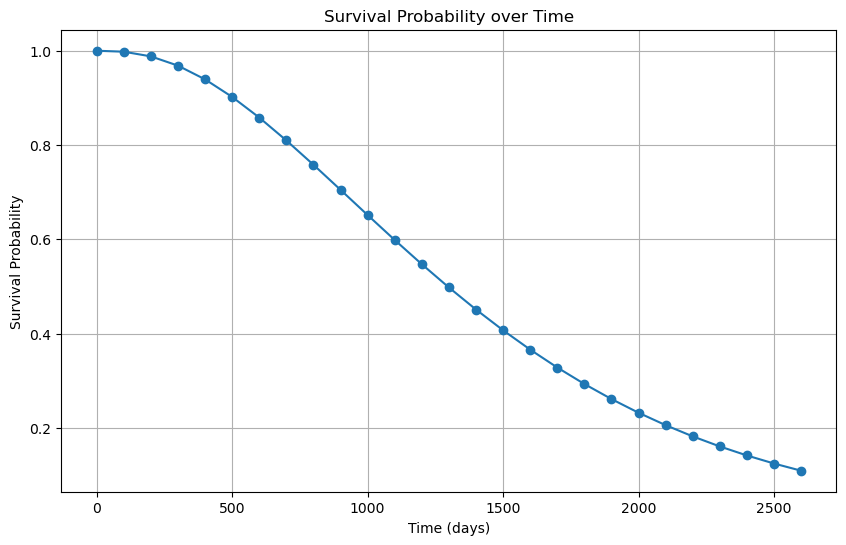

In [26]:
# Plotting survival probabilities
plt.figure(figsize=(10, 6))
plt.plot(t_values, survival_probabilities, marker='o')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Survival Probability over Time')
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
# Generate predictions using the gamma distribution
predictions = gamma(shape, loc, scale).rvs(len(df))

# Evaluate model performance (example using mean squared error)
mse = mean_squared_error(df['Survival time (days)'], predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1297325.1019851847


### Visualization

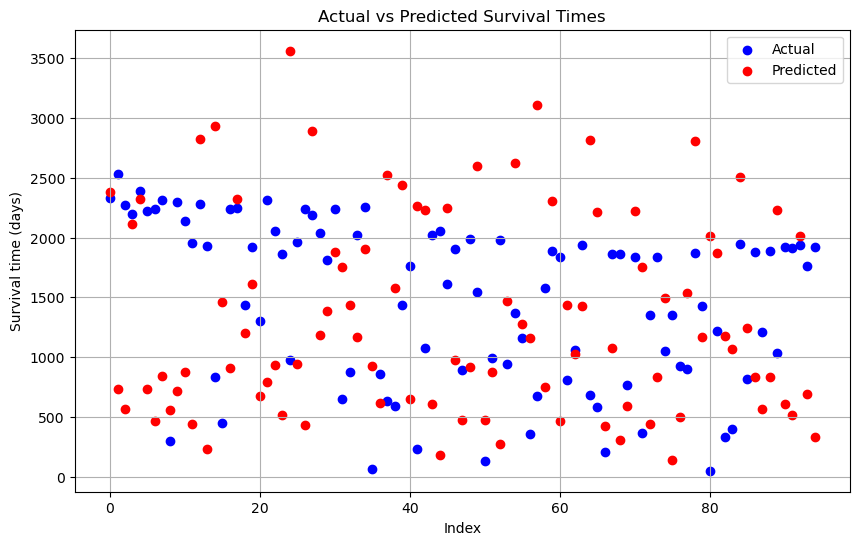

In [28]:
# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Survival time (days)'], color='blue', label='Actual')
plt.scatter(df.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Survival time (days)')
plt.title('Actual vs Predicted Survival Times')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from scipy.special import gammainc

In [32]:
# Generate hypothetical data for illustration
data = gamma.rvs(a=shape, scale=scale, size=100)

# Test hypothesis using incomplete gamma function
alpha = 0.05
mean_value = 2000  # Hypothetical mean survival time

# Calculate p-value using cumulative distribution function (incomplete gamma function)
p_value = 1 - gammainc(shape, mean_value / scale)

print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: Mean survival time is significantly different.")
else:
    print("Fail to reject null hypothesis: Mean survival time is not significantly different.")

P-value: 0.23217400827018364
Fail to reject null hypothesis: Mean survival time is not significantly different.


In [33]:
import statsmodels.api as sm

In [34]:
# Fit gamma regression model
model = sm.GLM(df['Survival time (days)'], df[['Tumor size (cm)', 'Age']], family=sm.families.Gamma())
results = model.fit()

# Print model summary
print(results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Survival time (days)   No. Observations:                   95
Model:                              GLM   Df Residuals:                       93
Model Family:                     Gamma   Df Model:                            1
Link Function:            inverse_power   Scale:                         0.24928
Method:                            IRLS   Log-Likelihood:                -775.62
Date:                  Wed, 26 Jun 2024   Deviance:                       38.846
Time:                          11:47:57   Pearson chi2:                     23.2
No. Iterations:                       7   Pseudo R-squ. (CS):           -0.07967
Covariance Type:              nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Tumor size (cm)  7.129

C:\Users\Prokarsha\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


## OLS

In [35]:
# Add intercept column for the model
df['const'] = 1.0

# Fit linear regression model
model = sm.OLS(df['Survival time (days)'], df[['const', 'Tumor size (cm)', 'Age']])
results = model.fit()

# Print model summary
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Survival time (days)   R-squared:                       0.036
Model:                              OLS   Adj. R-squared:                  0.015
Method:                   Least Squares   F-statistic:                     1.735
Date:                  Wed, 26 Jun 2024   Prob (F-statistic):              0.182
Time:                          11:48:55   Log-Likelihood:                -752.37
No. Observations:                    95   AIC:                             1511.
Df Residuals:                        92   BIC:                             1518.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1079.

## Classification

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [38]:
# Example transformation assuming 'Tumor size (cm)' follows a gamma distribution
df['Tumor size (cm)_gamma_transformed'] = gamma.cdf(df['Tumor size (cm)'], a=2.5, loc=0, scale=1)

# Select features and target
X = df[['Tumor size (cm)_gamma_transformed', 'Age']]
y = df['Event (death: 1, alive: 0)']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         9
           1       0.00      0.00      0.00        10

    accuracy                           0.47        19
   macro avg       0.24      0.50      0.32        19
weighted avg       0.22      0.47      0.30        19

Accuracy: 0.47368421052631576


In [40]:
import numpy as np
from scipy.special import expit  # Sigmoid function

# Example predictions using logistic regression and sigmoid function
linear_predictions = np.dot(X_test, model.coef_.T) + model.intercept_
probabilities = expit(linear_predictions)  # Applying sigmoid function

# Example of using probabilities
predicted_classes = (probabilities >= 0.5).astype(int)

print("linear_predictions:", linear_predictions)
print("probabilities", probabilities)
print("predicted_classes", predicted_classes)

linear_predictions: [[-0.28250249]
 [-0.38954851]
 [-0.62056675]
 [-0.72571376]
 [-0.5058441 ]
 [-0.81982748]
 [-0.65959197]
 [-0.9586617 ]
 [-0.18173713]
 [-0.82110119]
 [-0.54086507]
 [-1.041198  ]
 [-0.75588432]
 [-0.62839133]
 [-0.5194981 ]
 [-0.58513561]
 [-0.30677726]
 [-0.89017549]
 [-0.31085361]]
probabilities [[0.42984036]
 [0.40382599]
 [0.34965256]
 [0.32613602]
 [0.37616827]
 [0.30580028]
 [0.34083128]
 [0.27714623]
 [0.45469036]
 [0.30552996]
 [0.36798637]
 [0.26091891]
 [0.31954049]
 [0.34787539]
 [0.3729696 ]
 [0.35775175]
 [0.42390157]
 [0.29107361]
 [0.4229064 ]]
predicted_classes [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


## Cluster Analysis

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
# Select numeric columns for clustering
X = df[['Tumor size (cm)', 'Age']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
k = 3  # Number of clusters (you can choose based on domain knowledge or elbow method)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Print cluster centers (centroid coordinates)
print("Cluster Centers (centroid coordinates):")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Tumor size (cm)', 'Age']))

Cluster Centers (centroid coordinates):
   Tumor size (cm)        Age
0         2.351852  78.814815
1         2.327451  61.725490
2         5.235294  61.764706


### Visualization

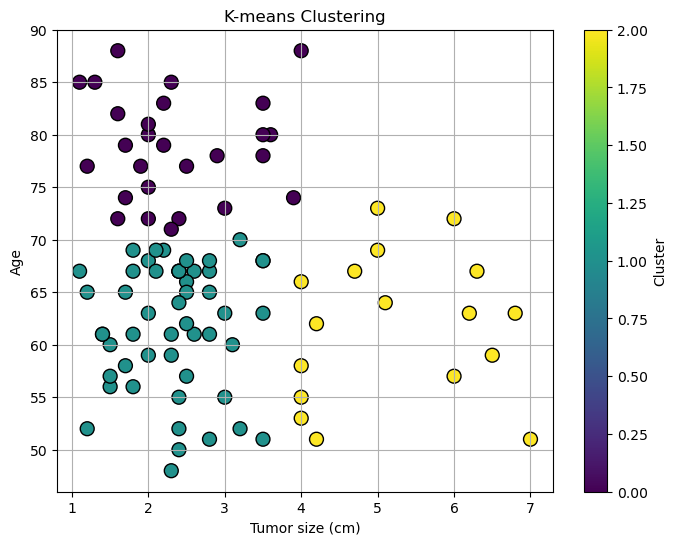

In [44]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Tumor size (cm)'], df['Age'], c=clusters, cmap='viridis', edgecolor='k', s=100)
plt.title('K-means Clustering')
plt.xlabel('Tumor size (cm)')
plt.ylabel('Age')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## Deployment Model

In [46]:
import joblib

# Assuming 'model' is your trained sklearn model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [48]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the trained model
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Assuming JSON input
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [49]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the trained model
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Assuming JSON input
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1